# Data mining - Time Series project

## Domain / Goal

The goal of this project is predicting the power than a certain windmill will generate knowing the last values and its current conditions.

## Code

### Imports

In [68]:
import numpy as np
import pandas as pd

### Load dataset

In [69]:
df = pd.read_csv("./data/Turbine_Data 2.csv")

### First glance and cleaning into the data

In [70]:
df.head()

,Date,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [5]:
df.tail()

,Date,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,...,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,...,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,...,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,...,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468
118223,2020-03-30 23:50:00+00:00,68.664425,27.915828,45.231610,1.499323,1.933124,1.933124,0.0,58.581716,54.080505,...,56.741040,39.003815,35.914062,203.0,14.439669,9.235532,2.0,G01,203.0,3.475205


We will convert the date column to *datetime* so that it matches it type.df['col'] = pd.to_datetime(df['col'])


In [71]:
df['Date'] = pd.to_datetime(df['Date'])
df.tail(2)

,Date,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,...,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468
118223,2020-03-30 23:50:00+00:00,68.664425,27.915828,45.231610,1.499323,1.933124,1.933124,0.0,58.581716,54.080505,...,56.741040,39.003815,35.914062,203.0,14.439669,9.235532,2.0,G01,203.0,3.475205


In [72]:
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


At first glance we see that there are negative **ActivePower** which cannot be the case since the power cannot be negative. We will set all this values to 0. Also we see that **ControlBoxTemperature** is always 0, so we will drop the column.

In [73]:
df = df.drop(columns=['ControlBoxTemperature'])
df.loc[df['ActivePower']<0,'ActivePower'] = 0
df.head()

,Date,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [74]:
df.describe(include = 'object')

,WTG
count,118224
unique,1
top,G01
freq,118224


We will drop also the column **WTG** because it has the same value for all the dataset.

In [75]:
df = df.drop(columns=['WTG'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   Date                          118224 non-null  datetime64[ns, UTC]
 1   ActivePower                   94750 non-null   float64            
 2   AmbientTemperatue             93817 non-null   float64            
 3   BearingShaftTemperature       62518 non-null   float64            
 4   Blade1PitchAngle              41996 non-null   float64            
 5   Blade2PitchAngle              41891 non-null   float64            
 6   Blade3PitchAngle              41891 non-null   float64            
 7   GearboxBearingTemperature     62540 non-null   float64            
 8   GearboxOilTemperature         62438 non-null   float64            
 9   GeneratorRPM                  62295 non-null   float64            
 10  GeneratorWinding1Tem

In [77]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32818 entries, 70789 to 118223
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   Date                          32818 non-null  datetime64[ns, UTC]
 1   ActivePower                   32818 non-null  float64            
 2   AmbientTemperatue             32818 non-null  float64            
 3   BearingShaftTemperature       32818 non-null  float64            
 4   Blade1PitchAngle              32818 non-null  float64            
 5   Blade2PitchAngle              32818 non-null  float64            
 6   Blade3PitchAngle              32818 non-null  float64            
 7   GearboxBearingTemperature     32818 non-null  float64            
 8   GearboxOilTemperature         32818 non-null  float64            
 9   GeneratorRPM                  32818 non-null  float64            
 10  GeneratorWinding1Temperature 

We have 32728 rows without missing values, but for the time series prediction, we will use the **ActivePower** of the last 5 days to predict the **ActivePower** of the given day. For this reason we will keep those rows without missing values where the values of **ActivePower** of the last 5 days are not null either.

In [78]:
for x in range(5): #Because we are adding the last 5 values
    df = pd.concat([df, df['ActivePower'].shift(x+1).rename(f"ActivePower-{x+1}")], axis=1)
df.tail()

,Date,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed,ActivePower-1,ActivePower-2,ActivePower-3,ActivePower-4,ActivePower-5
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,59.821165,55.193793,1029.870744,...,13.775785,9.234004,2.0,178.0,3.533445,90.331065,99.670237,117.706939,147.223697,145.027415
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,59.142038,54.798545,1030.160478,...,8.088928,9.229370,2.0,178.0,3.261231,70.044465,90.331065,99.670237,117.706939,147.223697
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,58.439439,54.380456,1030.137822,...,4.355978,9.236802,2.0,178.0,3.331839,40.833474,70.044465,90.331065,99.670237,117.706939
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,58.205413,54.079014,1030.178178,...,12.018077,9.237374,2.0,190.0,3.284468,20.777790,40.833474,70.044465,90.331065,99.670237
118223,2020-03-30 23:50:00+00:00,68.664425,27.915828,45.231610,1.499323,1.933124,1.933124,58.581716,54.080505,1029.834789,...,14.439669,9.235532,2.0,203.0,3.475205,62.091039,20.777790,40.833474,70.044465,90.331065


Now we drop the rows with null values

In [79]:
df = df.dropna().reset_index(drop=True)
df

,Date,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed,ActivePower-1,ActivePower-2,ActivePower-3,ActivePower-4,ActivePower-5
0,2019-05-06 14:10:00+00:00,0.000000,39.308243,47.154927,45.736893,43.699357,43.699357,58.852308,56.782879,68.210284,...,-15.007223,0.672715,2.0,44.80,2.212693,0.000000,15.953278,50.838159,83.623673,0.000000
1,2019-05-06 14:30:00+00:00,0.000000,39.206277,40.058399,41.260297,41.260230,41.260230,48.911180,56.033333,68.229411,...,-10.851533,0.508198,2.0,49.00,2.130019,0.000000,0.000000,0.000000,15.953278,50.838159
2,2019-05-06 14:50:00+00:00,0.000000,39.194184,46.500652,39.576077,39.576122,39.576122,56.859428,55.873937,85.012009,...,-10.303578,0.715614,2.0,61.50,2.347810,0.000000,0.000000,0.000000,0.000000,0.000000
3,2019-05-06 15:00:00+00:00,0.000000,38.992667,46.419196,47.399521,48.299502,48.299502,56.761226,55.807661,63.945036,...,-12.594477,0.550434,129.0,93.25,2.161460,0.000000,0.000000,0.000000,0.000000,0.000000
4,2019-05-06 15:10:00+00:00,0.000000,38.686212,46.280597,50.363603,50.363691,50.363691,56.483241,55.451512,21.339981,...,-11.181515,0.251628,282.0,138.50,1.913490,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31708,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,59.821165,55.193793,1029.870744,...,13.775785,9.234004,2.0,178.00,3.533445,90.331065,99.670237,117.706939,147.223697,145.027415
31709,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,59.142038,54.798545,1030.160478,...,8.088928,9.229370,2.0,178.00,3.261231,70.044465,90.331065,99.670237,117.706939,147.223697
31710,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,58.439439,54.380456,1030.137822,...,4.355978,9.236802,2.0,178.00,3.331839,40.833474,70.044465,90.331065,99.670237,117.706939
31711,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,58.205413,54.079014,1030.178178,...,12.018077,9.237374,2.0,190.00,3.284468,20.777790,40.833474,70.044465,90.331065,99.670237


We end up with 31713 rows which is now much of a difference with the 32.728 rows we had previously just by removing the null values.

### Visualizations

Import modules

For the sake of clarity, the visualizations have been divided in two groups, associating the Active Power generated with environmental factors and Windmill engines.

In [80]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.ticker as ticker

### Relationship between active power and environmental factors

First, it will be checked if graphically any relationship can be observed between environmental factors, such as Wind Speed, Wind Direction or Ambient Temperature, with the Active Power generated by the mill. Towards this, line plots of each of the variables are represented below, comparing them to the date on which the value was taken.

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Ambient Temperature (ºC)')]

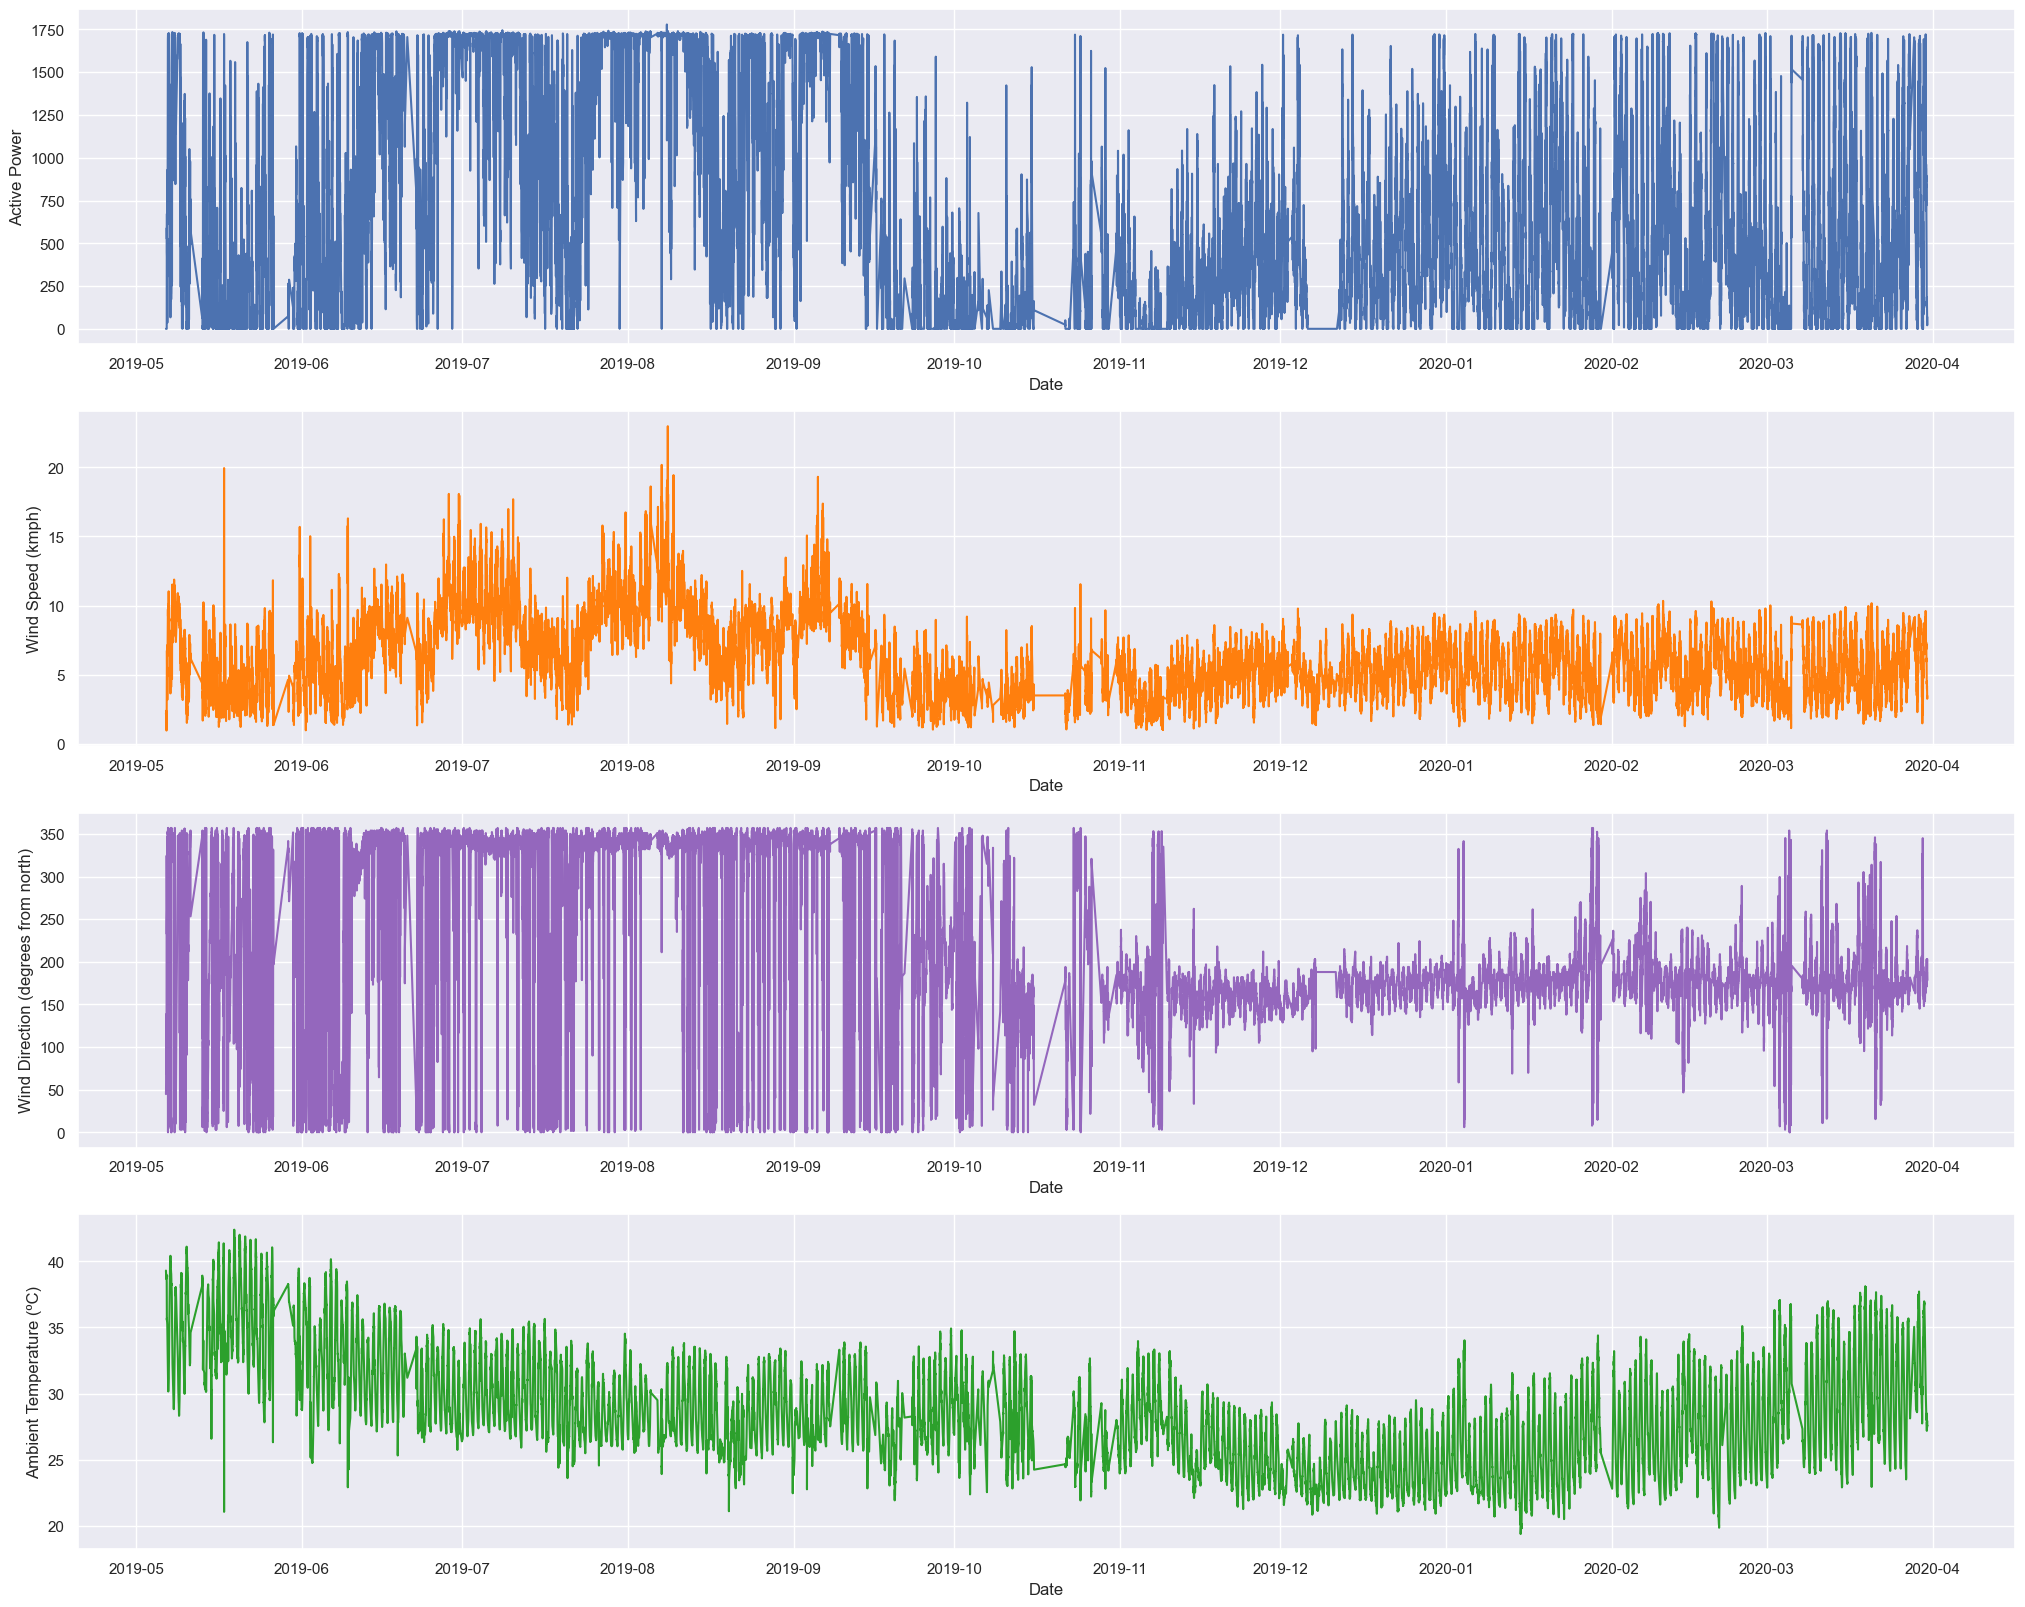

In [81]:
fig, ax = plt.subplots(4, figsize=(25, 20))

ax[0].plot(df["Date"], df["ActivePower"])
ax[0].set(xlabel="Date",ylabel="Active Power")
ax[1].plot(df["Date"], df["WindSpeed"], 'tab:orange')
ax[1].set(xlabel="Date",ylabel="Wind Speed (kmph)")
ax[2].plot(df["Date"], df["WindDirection"], 'tab:purple')
ax[2].set(xlabel="Date",ylabel="Wind Direction (degrees from north)")
ax[3].plot(df["Date"], df["AmbientTemperatue"], 'tab:green')
ax[3].set(xlabel="Date",ylabel="Ambient Temperature (ºC)")


At first glance, there is no direct and significant relationship between the variables. The Active Power oscillates between the extremes of its range across the entire sample time. If we look at each variable more closely through an overlay:


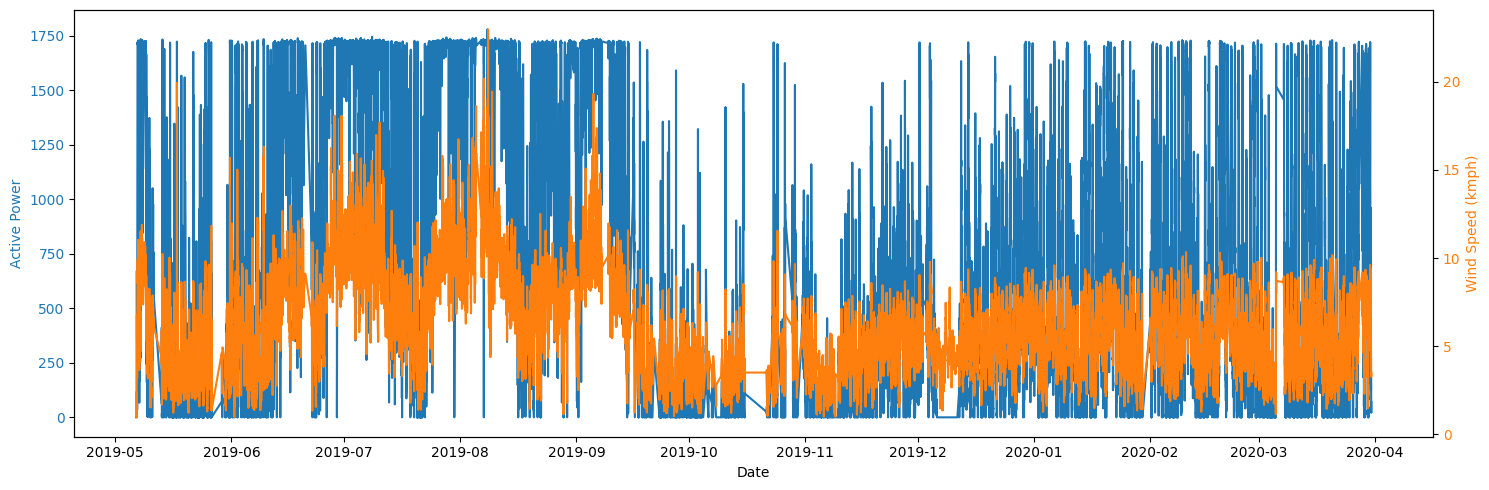

In [32]:
# Active Power and Wind Speed superposition
fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Active Power', color=color)
ax1.plot(df["Date"], df["ActivePower"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Wind Speed (kmph)', color=color)
ax2.plot(df["Date"], df["WindSpeed"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


Although no direct relationship can be found, it can be seen that when the Wind Speed increases, the production of Active Power increases, which makes sense. Two small time windows can also be observed, around 2019-06 and 2019-11 where values stabilize. In the first window (2019-06), the wind speed rises less abruptly than in the rest of the graph, so the Active Power increases, but less steeply. In the second window (2019-11), the wind speed stabilizes, causing a gradual decrease in the Active Power generated.


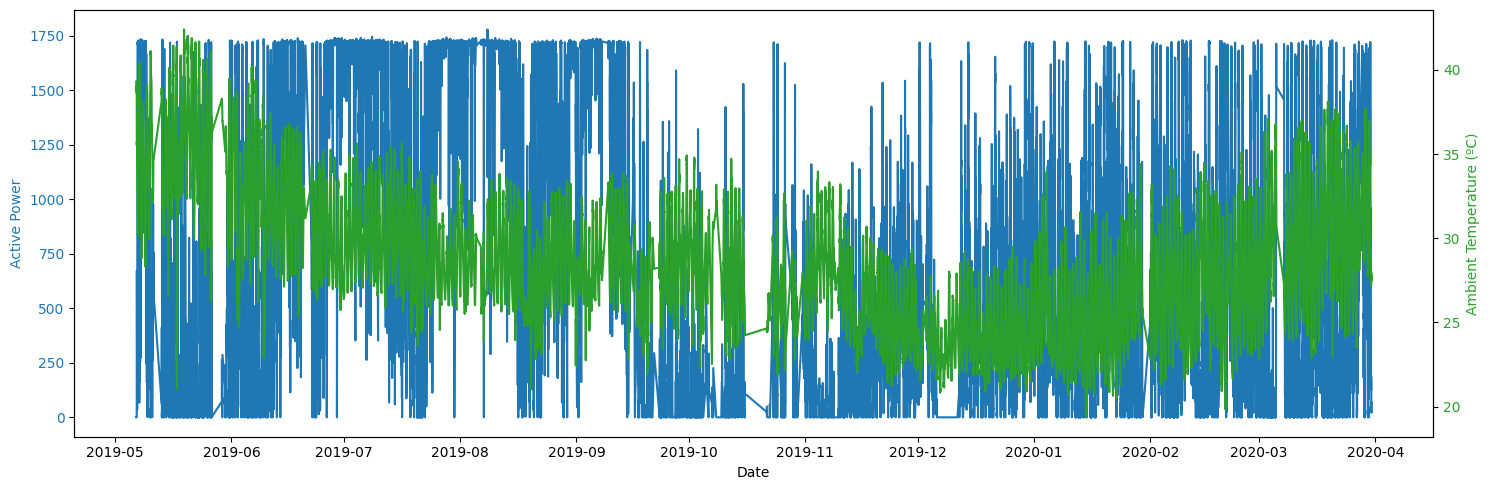

In [33]:
# Active Power and Wind Speed superposition
fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Active Power', color=color)
ax1.plot(df["Date"], df["ActivePower"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('Ambient Temperature (ºC)', color=color)
ax2.plot(df["Date"], df["AmbientTemperatue"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


In general, it can be seen that the highest generation of Active Power occurs when temperatures do not reach the extremes of their range and are at values around 30ºC, which occurs in the time period from 2019-07 to 2019-09.


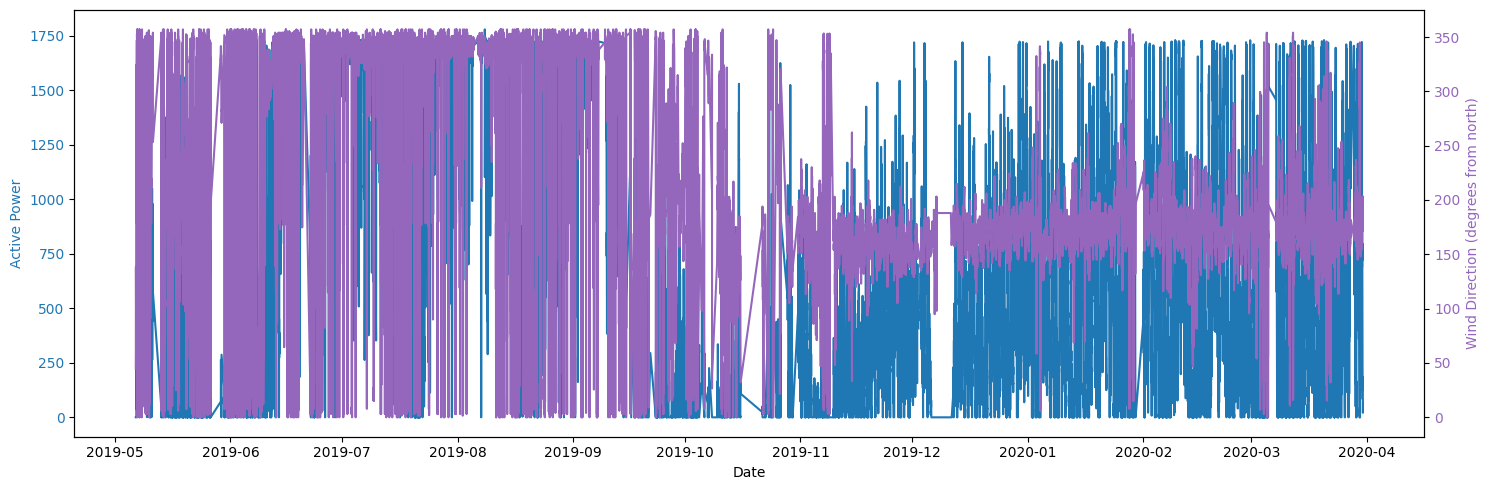

In [34]:
# Active Power and Wind Speed superposition
fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Active Power', color=color)
ax1.plot(df["Date"], df["ActivePower"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:purple'
ax2.set_ylabel('Wind Direction (degrees from north)', color=color)
ax2.plot(df["Date"], df["WindDirection"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

Only by the graphic representation it is not possible to say if there is a relationship between the variables or not, another type of analysis would be necessary.

### Relationship between active power and windmill engines: Bearing Shaft Temperature, Gearbox Oil Temperature, Generator RPM


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Generator RPM')]

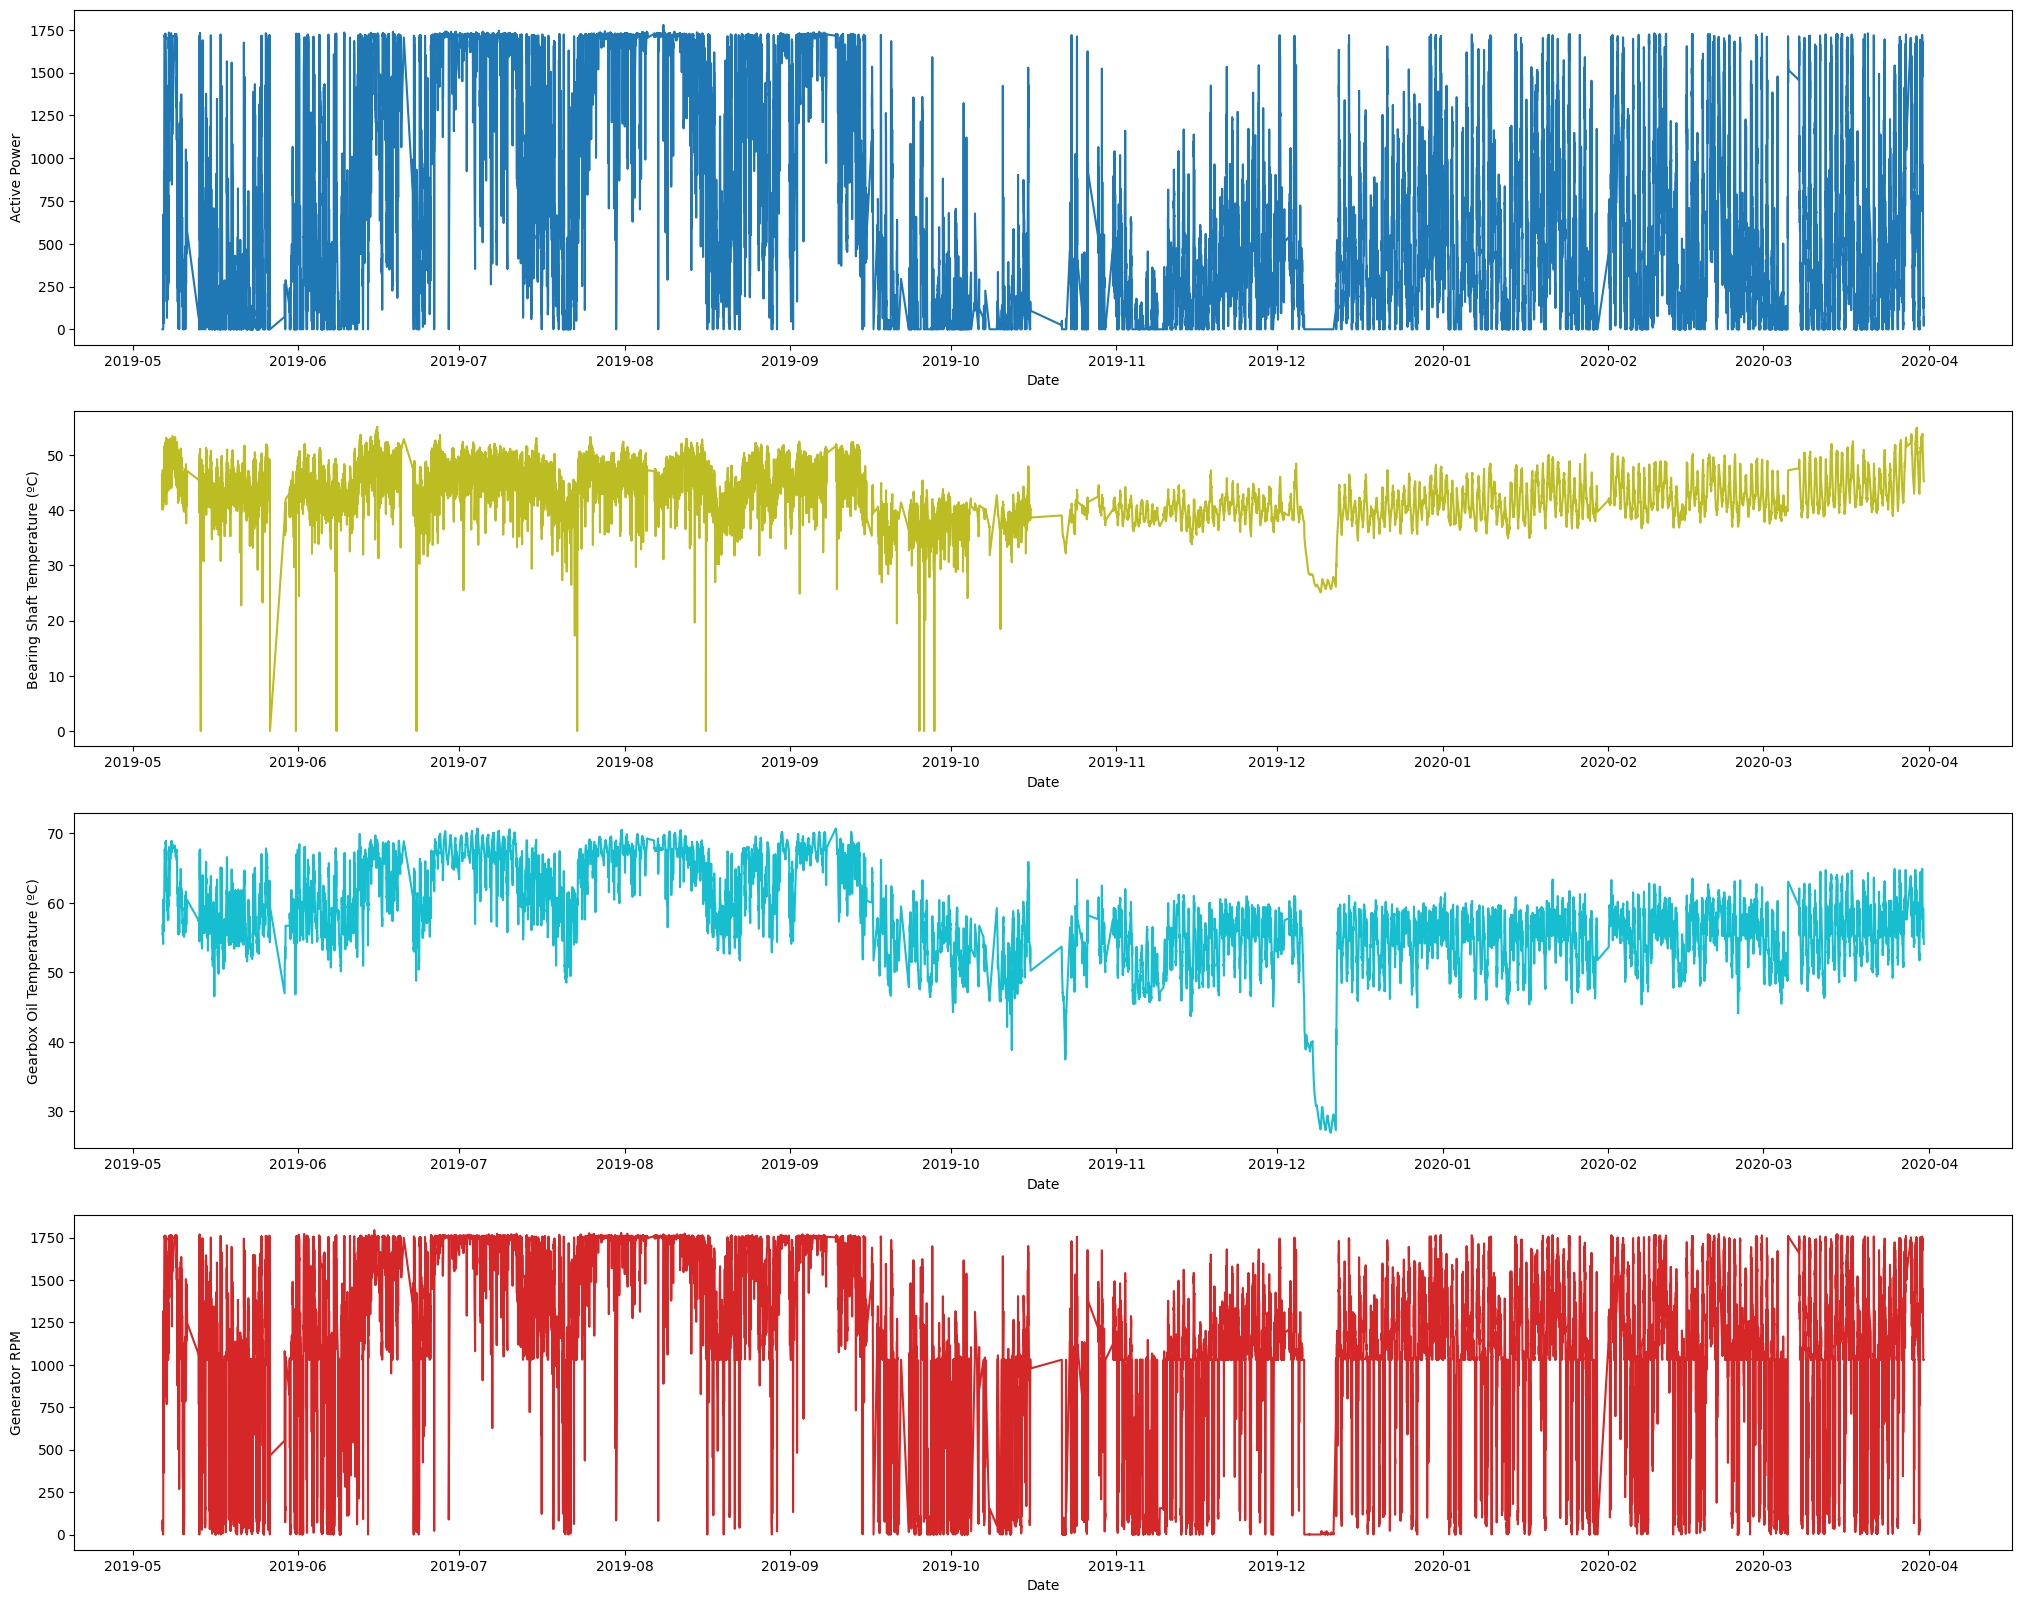

In [36]:
fig, ax = plt.subplots(4, figsize=(25, 20))

ax[0].plot(df["Date"], df["ActivePower"])
ax[0].set(xlabel="Date",ylabel="Active Power")
ax[1].plot(df["Date"], df["BearingShaftTemperature"], 'tab:olive')
ax[1].set(xlabel="Date",ylabel="Bearing Shaft Temperature (ºC)")
ax[2].plot(df["Date"], df["GearboxOilTemperature"], 'tab:cyan')
ax[2].set(xlabel="Date",ylabel="Gearbox Oil Temperature (ºC)")
ax[3].plot(df["Date"], df["GeneratorRPM"], 'tab:red')
ax[3].set(xlabel="Date",ylabel="Generator RPM")

In this case, we do see a more direct relationship between the production of Active Power and the state of the windmill components. The higher the RPM of the generator, the higher the temperature of the components, both the Gearbox and the Shaft. Higher performance of the windmill components means higher energy production. A decrease in the production of Active Power can be observed around 2019-12. If we look at the previous plots, in this time window the wind speed decreased, what makes sense that the RPM of the generator would decrease, the temperature of the components, and, as a consequence, the production of Active Power.
